## Import all libraries
 >Note that deepxde imports tensorflow already

In [22]:
import deepxde as dde
import numpy as np

## Definition of the problem constants
- phi_0 > This number has to be less than 2 degree [deg]
- g = 9.81 > Gravity [m/s^2]
- L = 2	> Length of cord attached to mass [m]
- t_end > Time [s]

In [24]:
phi_0 = 1
g = 9.81
L = 2
t_end = 5

## Specification of the geometry
>Note that this example is only time dependent, no space domain

In [25]:
geom = dde.geometry.TimeDomain(0,t_end)

## We define the ODE 
Define the residual using Tensowrflow syntax.

$$
d^2phi/dt^2 = - (g/L) * phi
$$

>Note that we need the implicit form here.

In [26]:
def ode(t, phi):
    d_phi_t = dde.grad.hessian(phi, t)
    return (d_phi_t + (g/L) * phi)/phi_0

## Add analytical solution
The analytical solution will only be displayed in the plots for visual comparison.  
This step is optional.

$$
phi(t) = phi_0 * cos(sqrt(g/L)*t)
$$

In [27]:
def func(t):
    return (phi_0 * np.cos(np.sqrt(g/L)*t))

## Add initial condition
$$
phi(0)=phi_0
$$

In [28]:
ic = dde.icbc.IC(geom, lambda x:phi_0, lambda _, on_initial: on_initial)

## Problem setup
Setup the Problem with the following input structure:

  Problem (
```
1. computational geometry
2. ODE Residual
3. Initial condition
4. Nr of collocation points inside the domain
5. Nr of collocation points on the boundary
6. analytical solution
7. Nr of testing points inside the domain
```
  )

In [29]:
data = dde.data.PDE(geom, ode, ic, num_domain=100, num_boundary=2, solution=func, num_test=150)

***

## Neuronal Network Setup
Set the Neuronal Network Parameters with the following input structure:

`([input] + [neurons] * Nr. of hidden layers + [output], "activation function", "Initializer")`

In [30]:
net = dde.nn.FNN([1] + [75]*4 + [1], "tanh", "Glorot uniform")

## Union of Problem and Neuronal Network

In [31]:
model = dde.Model(data, net)

## Definition of training parameters/algorithm
Set the hyper-parameters for the optimization with the following input structure:

`(training algorithm, learning rate)`

In [32]:
model.compile("adam", lr=0.001)

Compiling model...
Building feed-forward neural network...
'build' took 0.098422 s



/usr/local/lib/python3.9/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/usr/local/lib/python3.9/site-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.606121 s



## Training of the model
Choose the `number of training epochs`.

In [33]:
losshistory, train_state = model.train(epochs=10000)

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric
0         [1.77e-02, 1.00e+00]    [1.80e-02, 1.00e+00]    []  
1000      [2.22e-01, 1.40e-01]    [2.28e-01, 1.40e-01]    []  
2000      [9.96e-03, 3.61e-03]    [1.00e-02, 3.61e-03]    []  
3000      [9.13e-05, 1.32e-07]    [7.11e-05, 1.32e-07]    []  
4000      [2.81e-05, 1.55e-09]    [2.47e-05, 1.55e-09]    []  
5000      [9.26e-03, 1.64e-05]    [9.26e-03, 1.64e-05]    []  
6000      [1.07e-05, 1.37e-08]    [1.09e-05, 1.37e-08]    []  
7000      [8.39e-03, 7.74e-05]    [8.30e-03, 7.74e-05]    []  
8000      [1.95e-05, 8.04e-09]    [1.88e-05, 8.04e-09]    []  
9000      [1.22e-02, 5.89e-04]    [1.21e-02, 5.89e-04]    []  
10000     [1.64e-05, 1.86e-07]    [1.54e-05, 1.86e-07]    []  

Best model at step 6000:
  train loss: 1.07e-05
  test loss: 1.10e-05
  test metric: []

'train' took 26.360377 s



## Plotting
The first plot is the train- and test loss in every epoch.

The second plot is the comparison between the analytical and the predicted solution in the train model chosen by adam optimization.

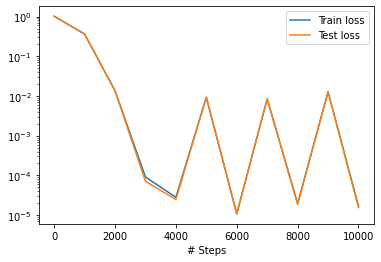

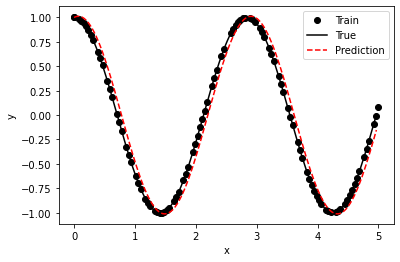

In [34]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)